In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats


# Data Collection & Cleaning

In [14]:
## Loading the Excel file into a DataFrame
url = "https://raw.githubusercontent.com/RohitG57/Estimation-of-obesity-levels-based-on-eating-habits-and-physical-condition/main/ObesityDataSet_raw_and_data_sinthetic.csv"
df= pd.read_csv(url)

In [15]:
# Getting the number of rows and columns in the DataFrame
df.shape

(2111, 17)

In [16]:
pd.set_option('display.max_columns', None)   #to show all columns
df.head(2)   # Displaying the first 2 rows of the DataFrame

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [17]:
## Displaying summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

* Dtype conversion needed
* no Missing values

In [18]:
df.columns #for renaming of columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

## Variable Table: Original → Renamed Columns and Types

## Location / Source:
* The table is based on the “Estimation of Obesity Levels Based on Eating Habits and Physical Condition” dataset, which can be found at: UCI Machine Learning Repository

| Original Name                  | New Name         | Type        | Description                                                      |
| ------------------------------ | ---------------- | ----------- | ---------------------------------------------------------------- |
| Gender                         | Gender           | Categorical | Gender                                                           |
| Age                            | Age              | Continuous  | Age                                                              |
| Height                         | Height           | Continuous  | Height                                                           |
| Weight                         | Weight           | Continuous  | Weight                                                           |
| family_history_with_overweight | FamilyOverweight | Binary      | Has a family member suffered or suffers from overweight?         |
| FAVC                           | HighCalFreq      | Binary      | Do you eat high caloric food frequently?                         |
| FCVC                           | VegMealFreq      | Integer     | Do you usually eat vegetables in your meals?                     |
| NCP                            | MealsPerDay      | Continuous  | How many main meals do you have daily?                           |
| CAEC                           | Snacking  | Categorical | Do you eat any food between meals?                               |
| SMOKE                          | SMOKE            | Binary      | Do you smoke?                                                    |
| CH2O                           | WaterIntake      | Continuous  | How much water do you drink daily?                               |
| SCC                            | TrackCalories    | Binary      | Do you monitor the calories you eat daily?                       |
| FAF                            | ExerciseFreq     | Continuous  | How often do you have physical activity?                         |
| TUE                            | ScreenTime       | Integer     | How much time do you use technological devices (phone, TV, etc.) |
| CALC                           | AlcoholFreq      | Categorical | How often do you drink alcohol?                                  |
| MTRANS                         | TransportMode    | Categorical | Which transportation do you usually use?                         |
| NObeyesdad                     | ObesityLevel     | Categorical | Obesity level (target variable)                                  |


In [19]:
##renaming columns to format suitable for analysis
df.rename(columns={
    "family_history_with_overweight": "FamilyOverweight",
    "FAVC": "HighCalFreq",
    "FCVC": "VegMealFreq",
    "NCP": "MealsPerDay",
    "CAEC": "Snacking",
    "CH2O": "WaterIntake",
    "SCC": "TrackCalories",
    "FAF": "ExerciseFreq",
    "TUE": "ScreenTime",
    "CALC": "AlcoholFreq",
    "MTRANS": "TransportMode",
    "NObeyesdad": "ObesityLevel"
}, inplace=True)

In [20]:
#checking renaming of columns
df.head(2)

,Gender,Age,Height,Weight,FamilyOverweight,HighCalFreq,VegMealFreq,MealsPerDay,Snacking,SMOKE,WaterIntake,TrackCalories,ExerciseFreq,ScreenTime,AlcoholFreq,TransportMode,ObesityLevel
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


## Dtype Conversion

#### `Unique` values of each column

In [21]:
#for loop to go through columns and get unique values at once
for col in df.columns:
    print(f"--- {col} ---")
    print(df[col].unique())
    print("\n")

--- Gender ---
['Female' 'Male']


--- Age ---
[21.       23.       27.       ... 22.524036 24.361936 23.664709]


--- Height ---
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]


--- Weight ---
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]


--- FamilyOverweight ---
['yes' 'no']


--- HighCalFreq ---
['no' 'yes']


--- VegMealFreq ---
[2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 1.003566 2.652779 2.897899
 2.483979 2.945967 2.478891 2.784464 1.00557

## Data Type Conversion

In [22]:
#Converting Age to interger.
df["Age"] = df["Age"].round().astype(int)

# Converting AlcoholFreq, TransportMode, ObesityLevel,Gender,Snacking to Categorical
df["Gender"] = df["Gender"].astype("category")
df["Snacking"] = df["Snacking"].astype("category")
df["AlcoholFreq"] = df["AlcoholFreq"].astype("category")
df["TransportMode"] = df["TransportMode"].astype("category")
df["ObesityLevel"] = df["ObesityLevel"].astype("category")

In [23]:
#To confirm if dtype conversion has been successfully applied
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Gender            2111 non-null   category
 1   Age               2111 non-null   int64   
 2   Height            2111 non-null   float64 
 3   Weight            2111 non-null   float64 
 4   FamilyOverweight  2111 non-null   object  
 5   HighCalFreq       2111 non-null   object  
 6   VegMealFreq       2111 non-null   float64 
 7   MealsPerDay       2111 non-null   float64 
 8   Snacking          2111 non-null   category
 9   SMOKE             2111 non-null   object  
 10  WaterIntake       2111 non-null   float64 
 11  TrackCalories     2111 non-null   object  
 12  ExerciseFreq      2111 non-null   float64 
 13  ScreenTime        2111 non-null   float64 
 14  AlcoholFreq       2111 non-null   category
 15  TransportMode     2111 non-null   category
 16  ObesityLevel      2111 n

## Checking for duplicate rows/observations

In [24]:
duplicate_rows = df.duplicated()
df[duplicate_rows]

,Gender,Age,Height,Weight,FamilyOverweight,HighCalFreq,VegMealFreq,MealsPerDay,Snacking,SMOKE,WaterIntake,TrackCalories,ExerciseFreq,ScreenTime,AlcoholFreq,TransportMode,ObesityLevel
98,Female,21,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [25]:
#number of duplicates
num_duplicates = duplicate_rows.sum()
num_duplicates

np.int64(24)

In [26]:
#dropping the duplicate rows
df.drop_duplicates(inplace=True)
df.shape

(2087, 17)

In [27]:
Total_rows = df.shape[0]
Total_rows

2087

#### * Total rows and Columns After removing duplicates : (2087, 17)

## Checking the total number of missing (NaN) values in each column
* This helps identify where data is incomplete and may need to be handled

In [28]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
FamilyOverweight,0
HighCalFreq,0
VegMealFreq,0
MealsPerDay,0
Snacking,0
SMOKE,0


- No missing Values in this Dataset

In [29]:
df.describe()  # for numeric

,Age,Height,Weight,VegMealFreq,MealsPerDay,WaterIntake,ExerciseFreq,ScreenTime
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.356493,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.379977,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,23.000000,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [30]:
df.describe(include='category')  # for categorical

,Gender,Snacking,AlcoholFreq,TransportMode,ObesityLevel
count,2087,2087,2087,2087,2087
unique,2,4,4,5,7
top,Male,Sometimes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1052,1761,1380,1558,351


# Data Analysis

## Bar Plot for Categorical variable

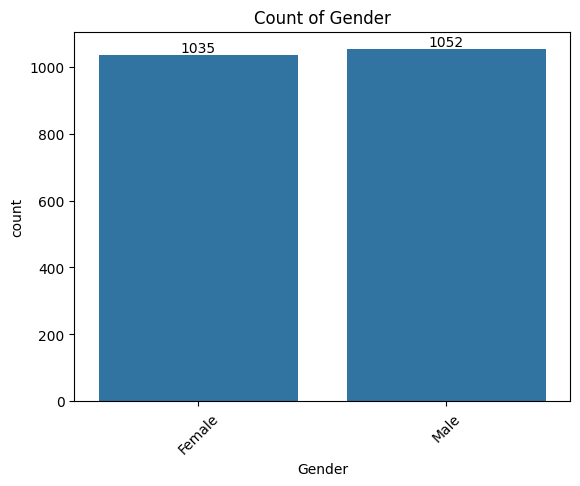

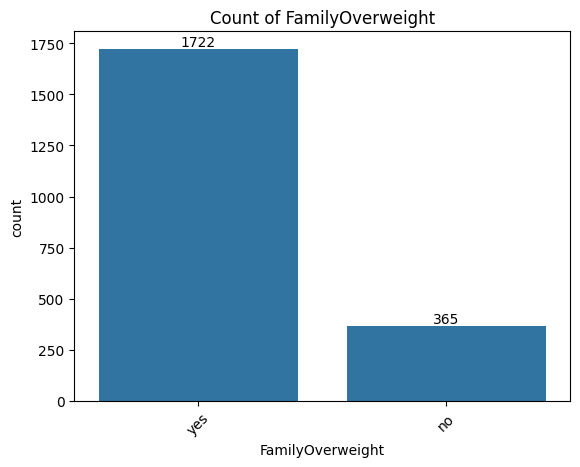

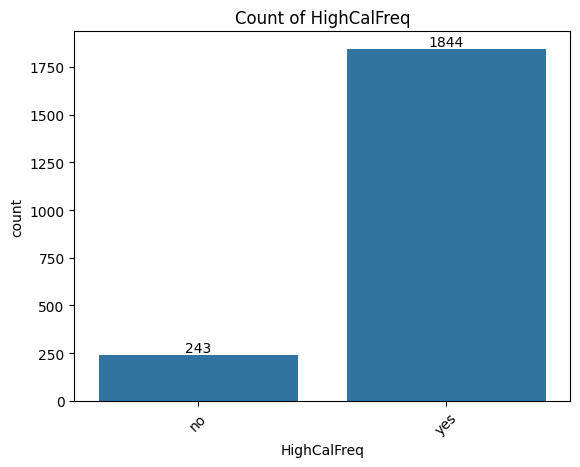

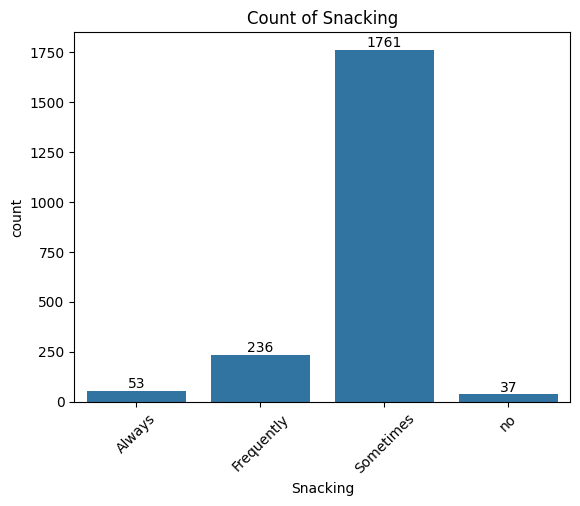

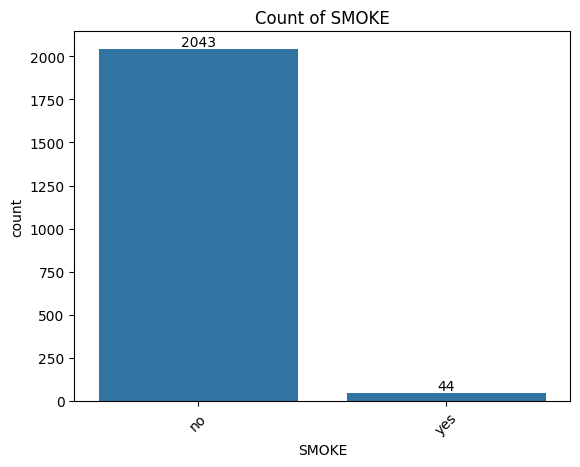

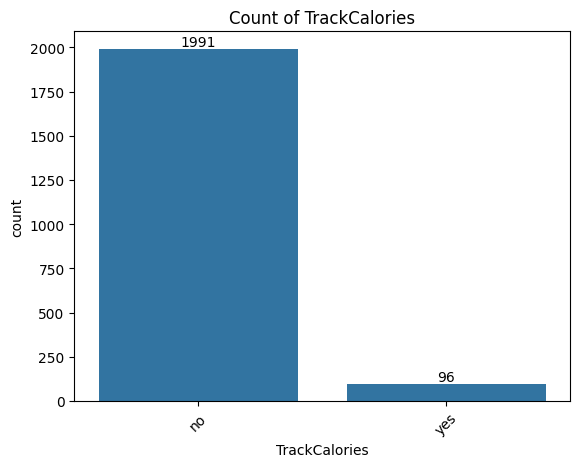

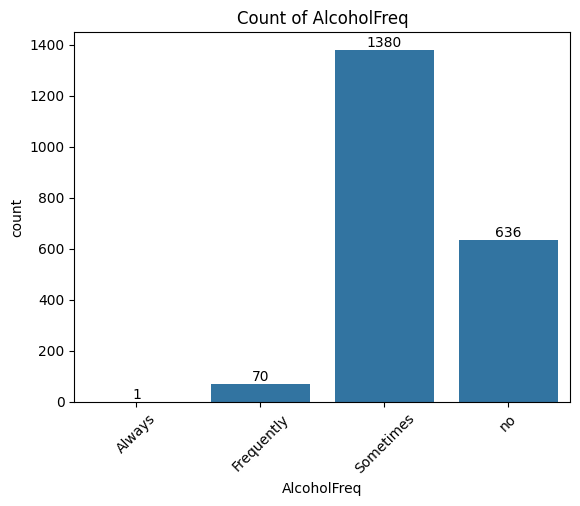

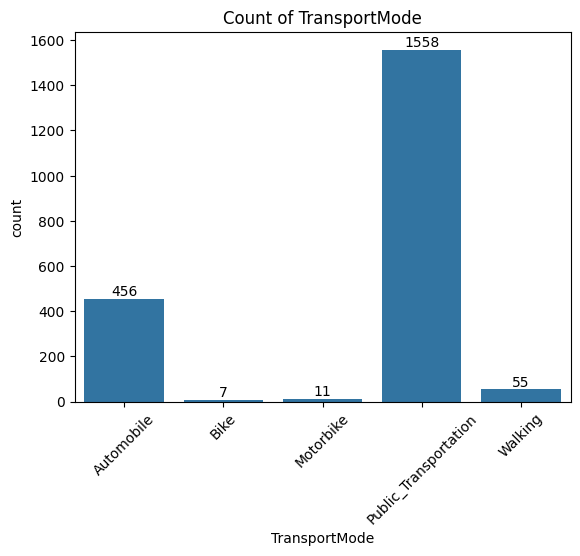

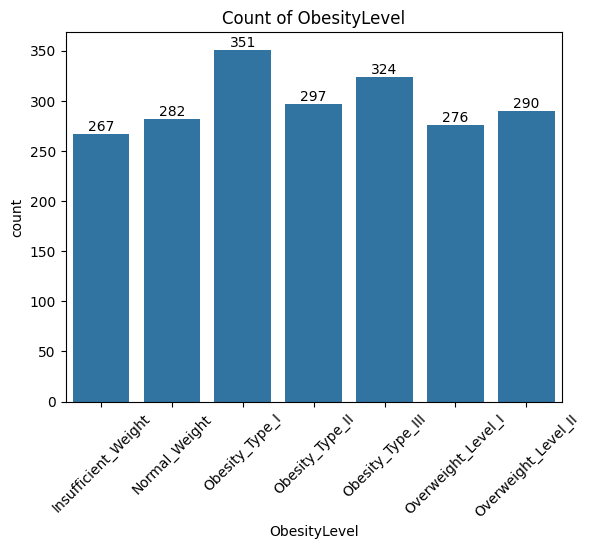

In [31]:
categorical_vars = ['Gender', 'FamilyOverweight', 'HighCalFreq', 'Snacking',
                    'SMOKE', 'TrackCalories', 'AlcoholFreq', 'TransportMode', 'ObesityLevel']

for i,var in enumerate(categorical_vars):
    # plt.figure(figsize=(6,4))
    ax = sns.countplot(x=var, data=df)
    plt.title(f'Count of {var}')
    plt.xticks(rotation=45)

    # Add counts on top of bars
    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='bottom', fontsize=10)

    plt.show()

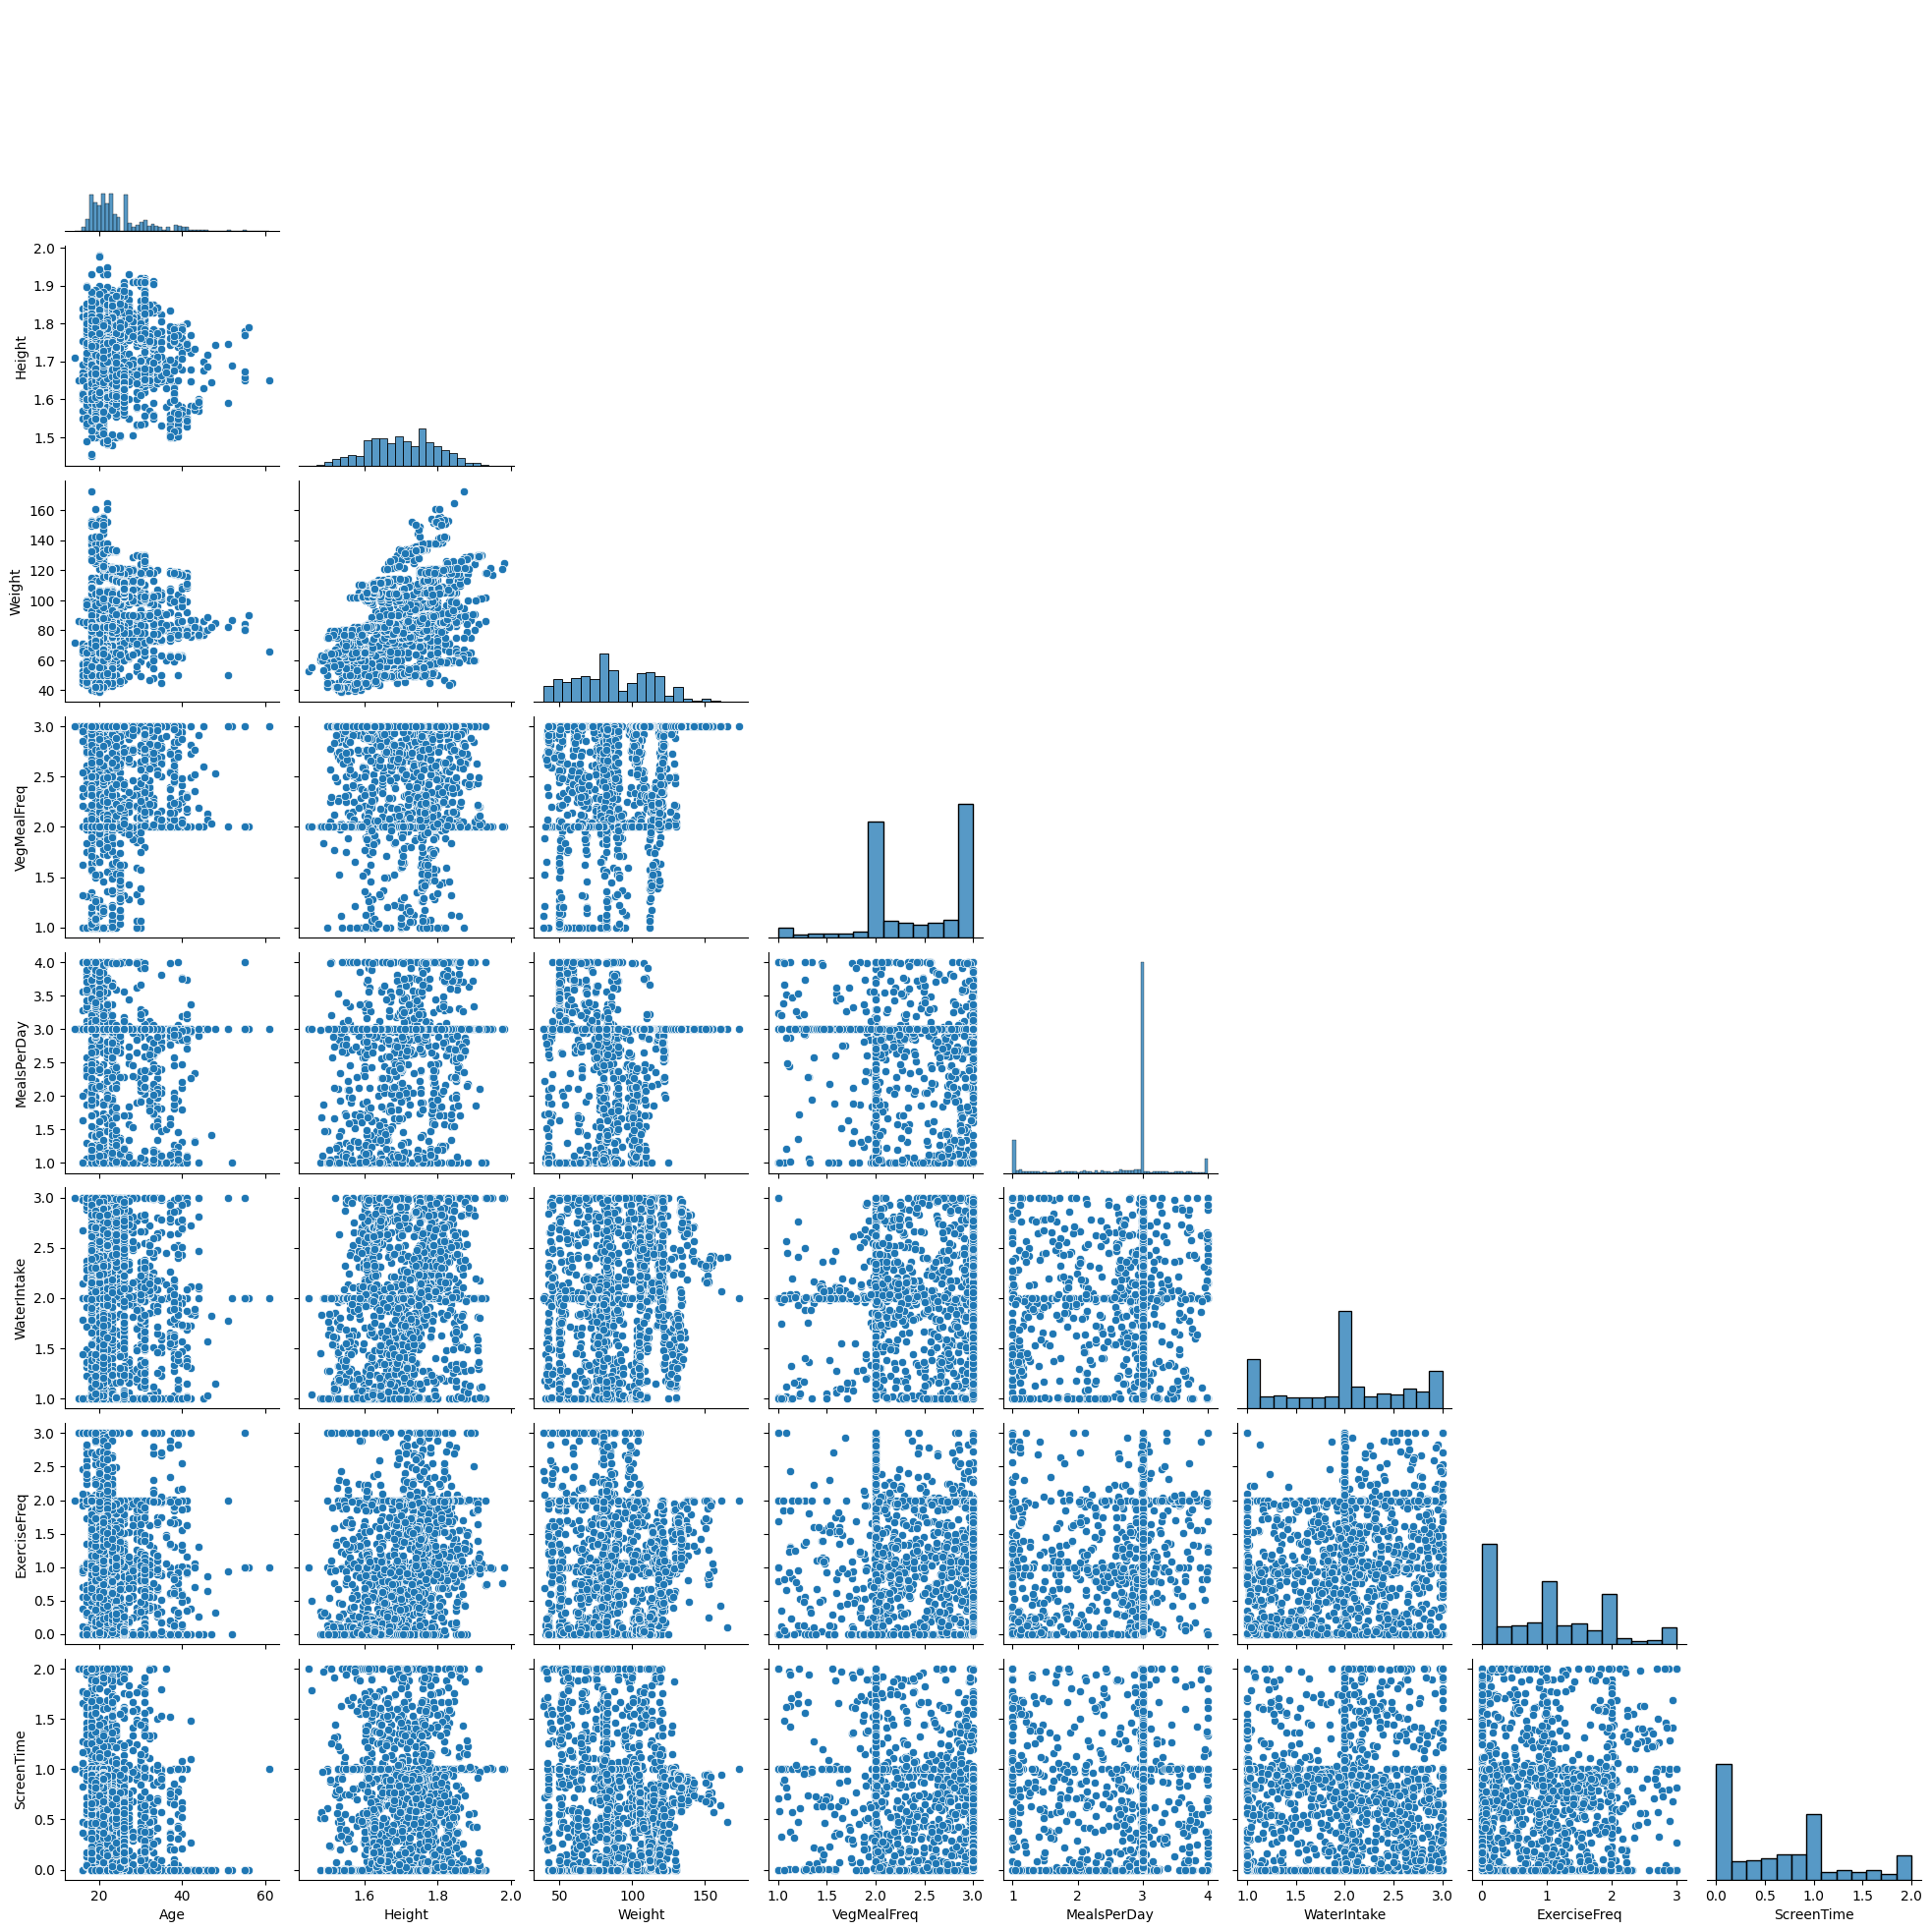

In [32]:
import seaborn as sns
sns.pairplot(df, corner=True)

Observations:

* When comparing `ScreenTime` and `Age`, people with age less than 40 have record of using more technological devices while people above 40 have almost no
usage of technological devices

* People with more than 125kg `Weight` have less than 2 hours of `ExerciseFreq`.

* People with more than 125kg `Weight` are having a 3 `MealsPerDay` where others are having meals 1-4 times a day.

## Boxplots for numarical columns to check outliers

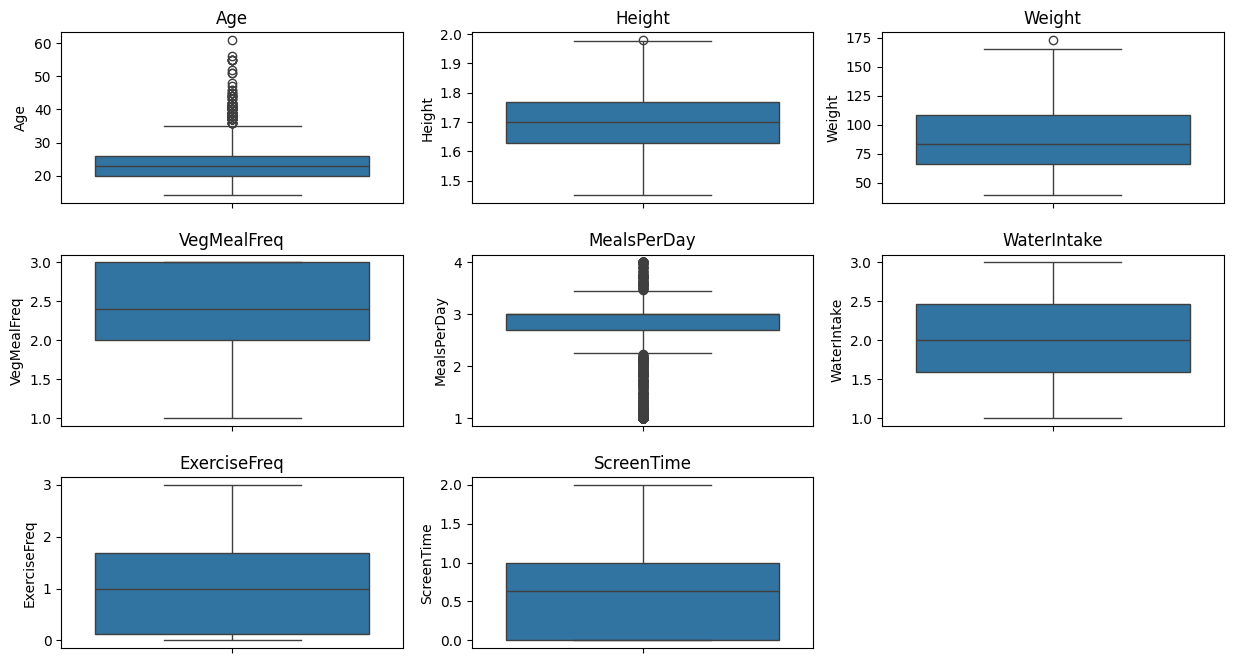

In [33]:
d = [ 'Age', 'Height', 'Weight','VegMealFreq', 'MealsPerDay', 'WaterIntake', 'ExerciseFreq', 'ScreenTime']
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(15,8))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.3, wspace=0.2)

for i,column in enumerate(d):

    sns.boxplot(y=df[column],ax=axes[i])
    axes[i].set_title(column)

fig.delaxes(axes[len(d)])

Observations:

* `Age` columns has mean value of 24 and it has outliers.

* `Height`has mean value as 1.7 meters and one outlier of height 1.98 meters

* `Weight` has one outlier 173kg and the mean is 87kg

* `MealsPerDay` has mean value 2.7 and it has outliers.

## Bar plot for the count of each gender across age groups

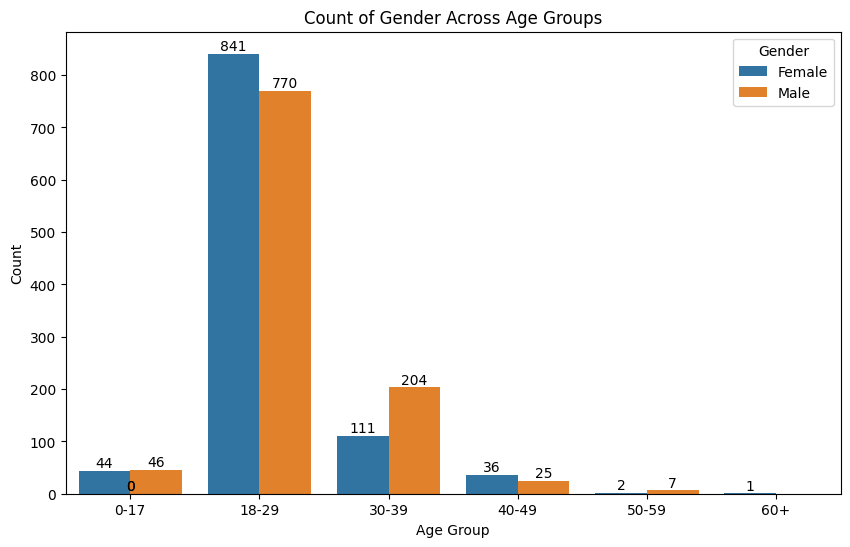

In [34]:
bins = [0, 18, 30, 40, 50, 60, 100]  # adjust based on your data
labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Plot counts of Gender by AgeGroup
plt.figure(figsize=(10,6))
ax = sns.countplot(x='AgeGroup', hue='Gender', data=df)
plt.title('Count of Gender Across Age Groups')

# Add counts on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=10)

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

## Histograms
* Purpose: Show the distribution of a continuous variable — whether it’s skewed, uniform, or normal.

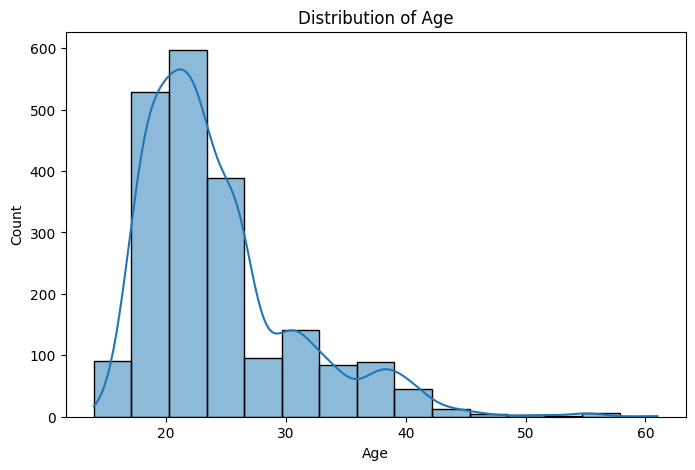

In [35]:
# Age histogram
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=15, kde=True)  # kde=True adds smooth curve
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

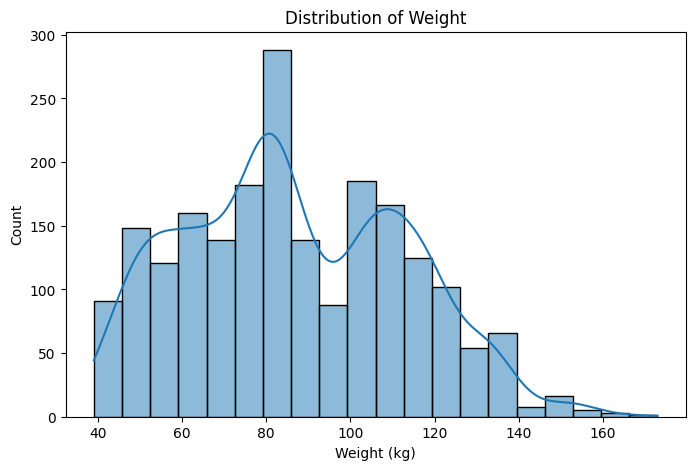

In [36]:
# Weight histogram
plt.figure(figsize=(8,5))
sns.histplot(df['Weight'], bins=20, kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()

## Show ObesityLevel proportion of each category - Pie Charts

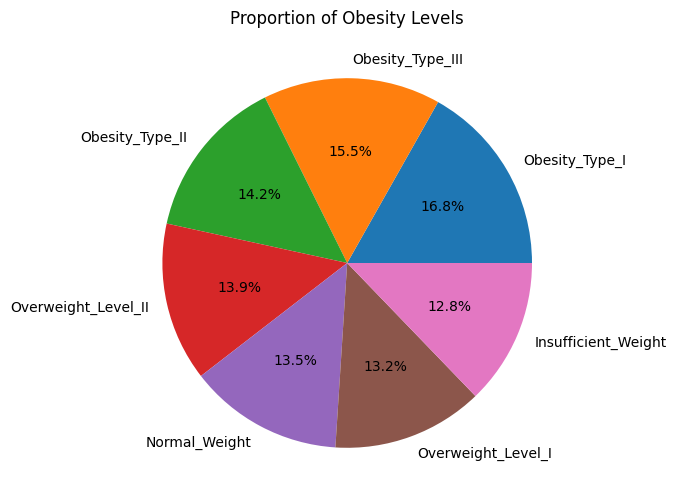

In [37]:
df['ObesityLevel'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title('Proportion of Obesity Levels')
plt.ylabel('')
plt.show()

Observations:

* Dataset has balanced data for 'ObesityLevel' column.

* Dataset has 16.8% of `Obesity_TypeI`, 14.2% of `Obesity_TypeII` and 15.5% of `Obesity_TypeIII`.

* And 13.2% of `Overweight_Level_I` and 13.9% of `Overweight_Level_II`.

* And 13.5% of `Normal_Weight` and 12.8% of `Insufficient_Weight`.

# Boxplot — comparing distributions

In [38]:
grouped = df.groupby('Gender', observed=True)['Weight'].describe()
grouped

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,1035.0,82.551078,29.693403,39.0,58.0,78.055968,105.046530,165.057269
Male,1052.0,91.096771,21.396028,45.0,75.0,90.000000,108.763868,173.000000


/tmp/ipython-input-26955393.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Weight', data=df, palette=custom_palette)


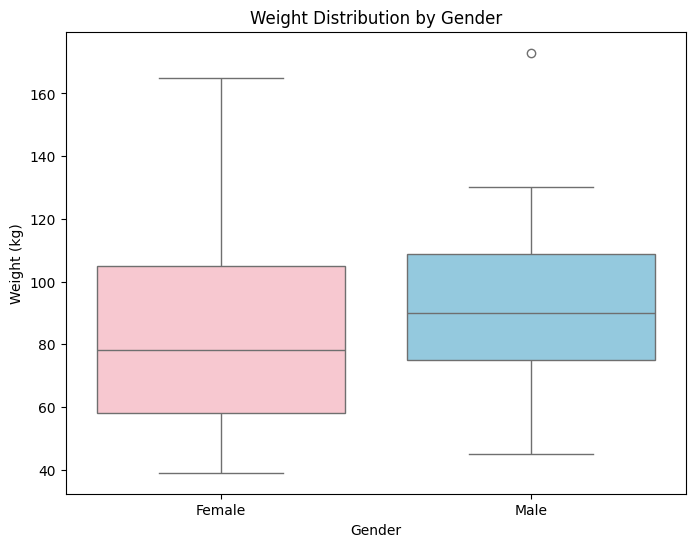

In [39]:
# Boxplot — comparing distributions
custom_palette = {'Female': 'pink', 'Male': 'skyblue'}
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Weight', data=df, palette=custom_palette)
plt.title('Weight Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Weight (kg)')
plt.show()

**Weight Distribution Observations**
- Higher Average Weight in Males: Males weigh more on average (90.8 kg) than females (82.3 kg), with a higher median as well.
- More Variability in Females: Female weights are more spread out (std ≈29.7) compared to males (std ≈21.4).
- Tighter Male Grouping: The middle 50% of male weights (IQR=33.5 kg) is more clustered than females (IQR=47.0 kg).
- Outliers Present: There is at least one high-weight outlier among males (173 kg).

# Hypothesis Testing

# 1. T -test for `Weight` vs `Gender`



T-statistic: -7.5327
P-value: 7.6781e-14
t-test critical value 1.9611956721953707


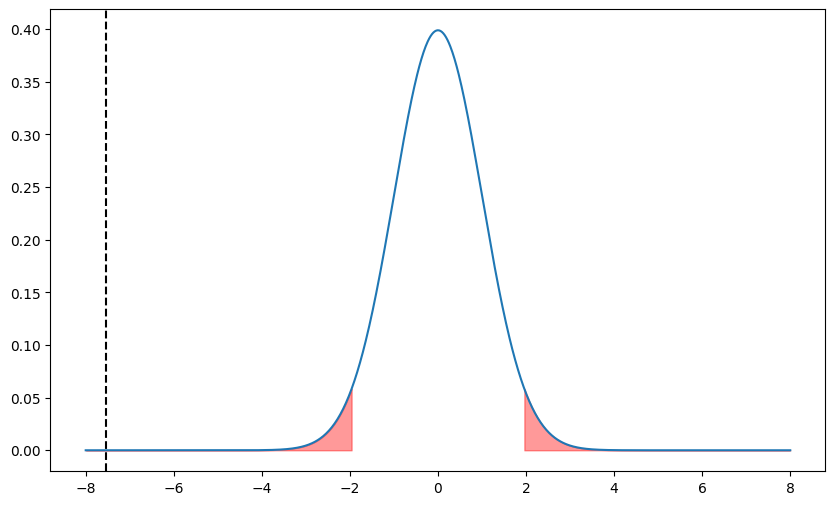

In [40]:
female_weight = df[df['Gender'] == 'Female']['Weight']
male_weight = df[df['Gender'] == 'Male']['Weight']

t_stat, p_value = stats.ttest_ind(female_weight, male_weight, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

# The standard deviation (spread of weights) for each gender.
sigma_male = male_weight.std(ddof=1)
sigma_female = female_weight.std(ddof=1)   # ddof=1 means we are calculating the sample standard deviation

stats.ttest_ind(female_weight, male_weight, equal_var=False)

n1 = len(male_weight)
n2 = len(female_weight)
alpha = 0.05

# Calculating the degrees of freedom
dof = ((sigma_male**2/n1 + sigma_female**2/n2)**2) / (((sigma_male**2/n1)**2 / (n1 - 1)) + ((sigma_female**2/n1)**2 / (n2 - 1)))

t_crit = stats.t.ppf(1 - alpha/2, dof)
print("t-test critical value",t_crit)

# Plotting
x = np.linspace(-8, 8, 1000)
y = stats.t.pdf(x,dof)

plt.figure(figsize=(10,6))
plt.plot(x,y)

# Shade rejection regions
plt.fill_between(x, y, where=(x <= -t_crit), color='red', alpha=0.4, label='Rejection region')
plt.fill_between(x, y, where=(x >= t_crit), color='red', alpha=0.4)

# Mark observed t-statistic
plt.axvline(t_stat, color='black', linestyle='--', label=f't-stat = {t_stat:.2f}')

plt.show()

## Observation:
- The T-Test shows a significant difference in weight between males and females.
- The test statistic (Z = 7.50) is much greater than the critical value (±1.96), so we reject the null hypothesis.
- The Type II error (β = 0.007) is very low, meaning there is a very small chance of missing a true difference.
- The power of the test (0.993) is very high, indicating a strong ability to detect a real difference if it exists.
- **Males weigh significantly more than females, and the test is highly reliable.**

# 2. Chi-square test for `Gender` vs `ObesityLevel`


- **Step 1** : Import the chi-square test function
  - chi2_contingency -> a function from scipy to perform the Chi-square test of independence.
  - Check whether two categorical variables are related or independent.
  - Here, we want to test if Gender and ObesityLevel are associated.
- **Step 2** : Create a contingency table
  - pd.crosstab() -> creates a table of counts (frequency table).
  - Rows -> categories of Gender (Male, Female).
  - Columns -> categories of ObesityLevel (Normal_Weight, Obesity_Type_I, etc.).
  - Each cell -> number of people in that Gender × ObesityLevel combination.
  - **The Chi-square test uses these counts to see if the distribution of ObesityLevel differs by Gender.**
- **Step 3** : Print the table
  - Displays the counts of each combination.

In [41]:
from scipy.stats import chi2_contingency

# Gender vs ObesityLevel
contingency_table = pd.crosstab(df['Gender'], df['ObesityLevel'])
print("Contingency Table:\n", contingency_table)

Contingency Table:
 ObesityLevel  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Gender                                                             
Female                        169            137             156   
Male                           98            145             195   

ObesityLevel  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Gender                                                                
Female                      2               323                 145   
Male                      295                 1                 131   

ObesityLevel  Overweight_Level_II  
Gender                             
Female                        103  
Male                          187  


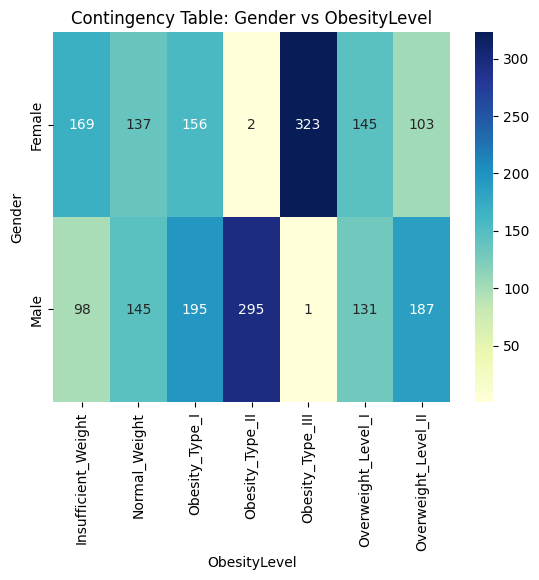

In [42]:
# Example: Gender vs ObesityLevel
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Contingency Table: Gender vs ObesityLevel')
plt.show()

- **Step 4** :
  - chi2 -> measures how much the observed counts deviate from expected counts under independence.
  - dof -> degrees of freedom: (rows - 1) * (columns - 1).
  - p-value -> probability of seeing this table if Gender and ObesityLevel are independent.
  - expected -> expected counts if the two variables were independent.
- **Step 5** : Decision rule
  - p < 0.05 → reject null -> Gender and ObesityLevel are associated.
  - p >= 0.05 → fail to reject null -> no evidence of association.

In [43]:
 # Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")
print("Expected Counts:\n", np.round(expected, 2))

if p < 0.05:
    print("Result: Significant association between Gender and ObesityLevel")
else:
    print("Result: No significant association between Gender and ObesityLevel")


Chi-square Statistic: 657.45
Degrees of Freedom: 6
P-value: 0.0000
Expected Counts:
 [[132.41 139.85 174.07 147.29 160.68 136.88 143.82]
 [134.59 142.15 176.93 149.71 163.32 139.12 146.18]]
Result: Significant association between Gender and ObesityLevel


**Obseravtion**
- The Chi-square test shows a significant association between Gender and Obesity Level (p-value = 0.0000).
- This means that the distribution of obesity levels is different for males and females.
- For example, more males are in Obesity_Type_II(295), while more females are in Obesity_Type_III(323).
**Gender is therefore related to how obesity levels are spread in this dataset.**

## 3. Hypothesis Testing for `Family History` vs `Weight`


### weather weight differs significantly between people with vs without family history of overweight
- Null Hypothesis:There is no difference in weight between the two groups.
- Alternative: There is a significant difference in weight between the two groups

T-statistic: 35.8177
P-value: 1.4275e-173


Text(0.5, 1.0, 'Weight by Family History of Overweight')

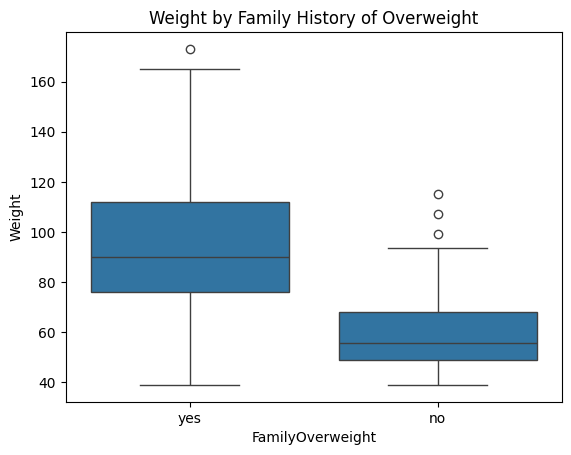

In [44]:
import scipy.stats as st

family_history_yes = df[df['FamilyOverweight'] == 'yes']['Weight']
family_history_no = df[df['FamilyOverweight'] == 'no']['Weight']

t_stat, pvalue = st.ttest_ind(family_history_yes, family_history_no, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {pvalue:.4e}")

sns.boxplot(x='FamilyOverweight', y='Weight', data=df)
plt.title('Weight by Family History of Overweight')

Text(0.5, 0.98, 'T-test: 35.8177, P_Value = 1.4275 × 10⁻¹⁷³')

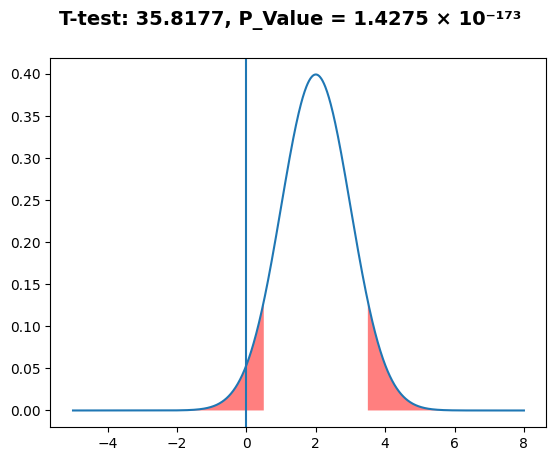

In [45]:
x1 = np.linspace(-5, 8,1000)
y1 = stats.norm.pdf(x1,2,1)

plt.plot(x1,y1)
plt.axvline(pvalue, ymin=0, ymax=1)

plt.fill_between(x=np.linspace(-5,0.5), y1=stats.norm.pdf(np.linspace(-5,0.5),2,1),facecolor = 'red',alpha=0.5)
plt.fill_between(x=np.linspace(3.5,8), y1=stats.norm.pdf(np.linspace(3.5,8),2,1),facecolor = 'red',alpha=0.5)
plt.suptitle("T-test: 35.8177, P_Value = 1.4275 × 10⁻¹⁷³", fontsize=14, fontweight="bold")

**Observation**
- P_value is almost 0, We can reject the null hypothesis.
- There is a significant difference in weight between the two groups

## 4. T-test: Tests whether physical activity differs significantly between obese and non-obese groups.

Let’s pick a plausible relationship: Hypothesis: Individuals who engage in more frequent physical activity have lower obesity levels.

Null Hypothesis (H₀): There is no difference in mean physical activity frequency between obese and non-obese individuals.
Alternative Hypothesis (H₁): Non-obese individuals have significantly higher mean physical activity frequency than obese individuals.

t-statistic: 7.047687573893543
p-value: 2.4630501964087806e-12


/tmp/ipython-input-2241735504.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ObesityLevelBinary', y='ExerciseFreq', data=df, palette="Set2", legend=False)


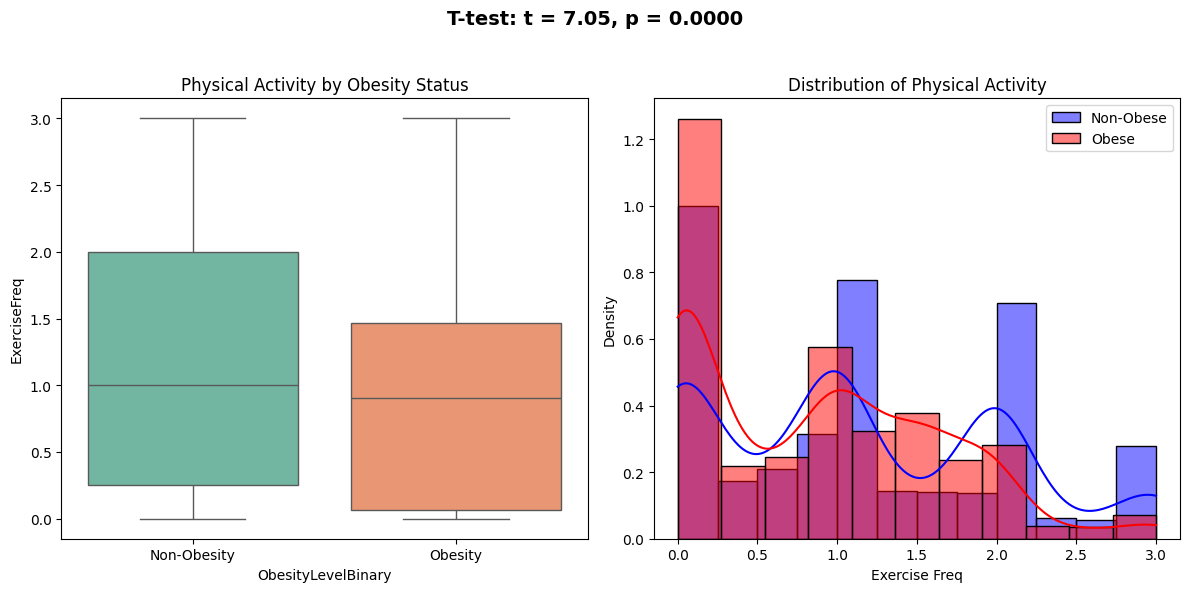

In [46]:
# Binary obesity variable: 1 if obesity-related, else 0
df['ObesityLevelBinary'] = df['ObesityLevel'].apply(lambda x: 1 if "Obesity" in x else 0)

# Split groups
obesity_group = df[df['ObesityLevelBinary'] == 1]['ExerciseFreq']
non_obesity_group = df[df['ObesityLevelBinary'] == 0]['ExerciseFreq']

# t-test
t_stat, p_val = stats.ttest_ind(non_obesity_group, obesity_group, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_val)

# --- Visualization ---

plt.figure(figsize=(12,6))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(x='ObesityLevelBinary', y='ExerciseFreq', data=df, palette="Set2", legend=False)
plt.xticks([0,1], ['Non-Obesity','Obesity'])
plt.title("Physical Activity by Obesity Status")

# Histogram / KDE
plt.subplot(1,2,2)
sns.histplot(non_obesity_group, color="blue", label="Non-Obese", kde=True, stat="density", alpha=0.5)
sns.histplot(obesity_group, color="red", label="Obese", kde=True, stat="density", alpha=0.5)
plt.title("Distribution of Physical Activity")
plt.xlabel("Exercise Freq")
plt.legend()

# Annotation with t-test results
plt.suptitle(f"T-test: t = {t_stat:.2f}, p = {p_val:.4f}", fontsize=14, fontweight="bold")

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

T-test Result Observation:
  
  - t-statistic : 7.05
  - p-value: approximately 0.0000 - this indicates the exercise frequency affects the obesity level. So we can reject the Null hypothesis that exercise doesnot affect Obesity.
  
  - Boxplot: The median exercise frequency appears higher for the non obese group compared to the obeses group.
           The spread of data looks somewhat similar but with the higher range of non-obese group.

  - Histogram/KDE(with density curves) :
  Non-obese(blue) : The distribution shows higher exercise frequencies are more common.                                                                  Obese(red) : This distribution is skewed towards lower exercise frequencies.

Interpretation : Overall there is a significant difference in exercise frequency between non-obese & obese groups. The non-obese group tends to have a higher exercise frequency compared to the obese group.

### 5. ANOVA :  `Snacking` vs `Weight`

Null Hypothesis : The mean is the same across all groups. , where is the mean for observations in group Sometimes,Freqently,Always and no for 'Snacking' column.<br>
Alternative Hypothesis : At least one mean is different.

<Axes: xlabel='Snacking', ylabel='Weight'>

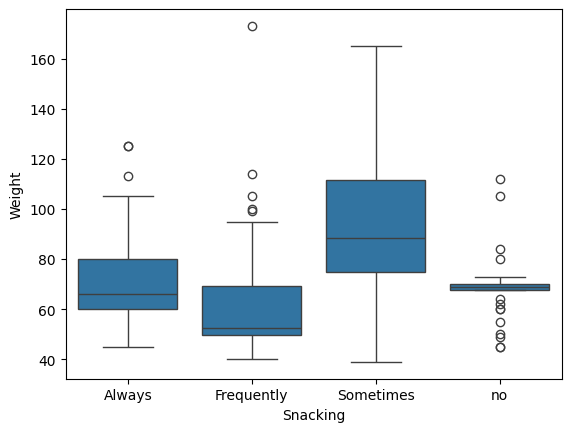

In [47]:
import scipy.stats as stats

sns.boxplot(x='Snacking',y='Weight',data=df)

In [48]:
df.groupby('Snacking')['Weight'].describe()

/tmp/ipython-input-1312475778.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Snacking')['Weight'].describe()


,count,mean,std,min,25%,50%,75%,max
Snacking,,,,,,,,
Always,53.0,71.090566,18.434867,45.0,60.000000,66.000000,80.000000,125.000000
Frequently,236.0,59.120059,16.611365,40.0,49.635322,52.500000,69.125000,173.000000
Sometimes,1761.0,91.436688,24.981576,39.0,75.000000,88.431954,111.485516,165.057269
no,37.0,68.487214,12.756831,45.0,67.722222,68.869791,70.000000,112.000000


* The boxplot and above table shows that people with sometime snacking habit weigh more than others and mean values is also higher than others(in this data).

In [49]:
#the ANOVA test we use here is one-way because all groups are from a single categorical variable

f_stat,p_value =  stats.f_oneway(df[df['Snacking'] == 'Sometimes']['Weight'],
                                    df[df['Snacking'] == 'Frequently']['Weight'],
                                    df[df['Snacking'] == 'Always']['Weight'],
                                    df[df['Snacking'] == 'no']['Weight'])

print(f'F-statisticss: {f_stat}')
print(f'P value: {p_value}')

F-statisticss: 142.84953264826825
P value: 3.582547257093843e-84


#### Observations:

* The large F value provides stronger evidence against the null hypothesis.

* A p-value is 3.58e-84 much smaller than the default significance level 0.05.

* Thus, the null hypothesis can be rejected and we conclude that at least one group is different from the rest.

In [50]:
import statsmodels.stats.multicomp as mc

comparisons = mc.MultiComparison(df['Weight'], df['Snacking'])
table, arr1, arr2 = comparisons.allpairtest(stats.ttest_ind,  method='bonf')

table

group1,group2,stat,pval,pval_corr,reject
Always,Frequently,4.6444,0.0,0.0,True
Always,Sometimes,-5.8805,0.0,0.0,True
Always,no,0.7432,0.4594,1.0,False
Frequently,Sometimes,-19.3069,0.0,0.0,True
Frequently,no,-3.2798,0.0012,0.007,True
Sometimes,no,5.5716,0.0,0.0,True


#### Observation
* Always vs Frequently,Always vs Sometimes, Frequently vs Sometimes, Frequently vs	no, Sometimes vs no,  All show statistically significant differences.
* The lack of significance between Always and no.

# 6. Chi-Square Test - TransportMode vs ObesityLevel

In [51]:
# Create a contingency table
contingency_table = pd.crosstab(df['TransportMode'], df['ObesityLevel'])

print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square Test Results:")
print("Chi2 Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)

# Show expected counts
expected_df = pd.DataFrame(expected,
                           index=contingency_table.index,
                           columns=contingency_table.columns)

print("\nExpected Frequencies:")
print(expected_df)

Contingency Table:
ObesityLevel           Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
TransportMode                                                               
Automobile                              46             44             110   
Bike                                     0              4               0   
Motorbike                                0              6               3   
Public_Transportation                  215            197             236   
Walking                                  6             31               2   

ObesityLevel           Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
TransportMode                                                                  
Automobile                          95                 1                  66   
Bike                                 1                 0                   2   
Motorbike                            0                 0                   1   
Public_Transportation              200   

**Observation**
- Chi-Square statistic: 288.57
- Degrees of freedom: 24
- p-value: 3.33 × 10⁻⁴⁷
- The chi-square test shows a very strong relationship between a person's mode of transportation and their obesity level.

- The p-value is extremely small, which means this pattern did not happen by chance. In simple terms, how people travel, whether they walk, use public transportation, or drive, is clearly connected to their weight category.

# Logistic Regression Model

In [52]:
df['BMI'] = df['Weight'] / (df['Height']**2)

/tmp/ipython-input-1302643941.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="coolwarm")


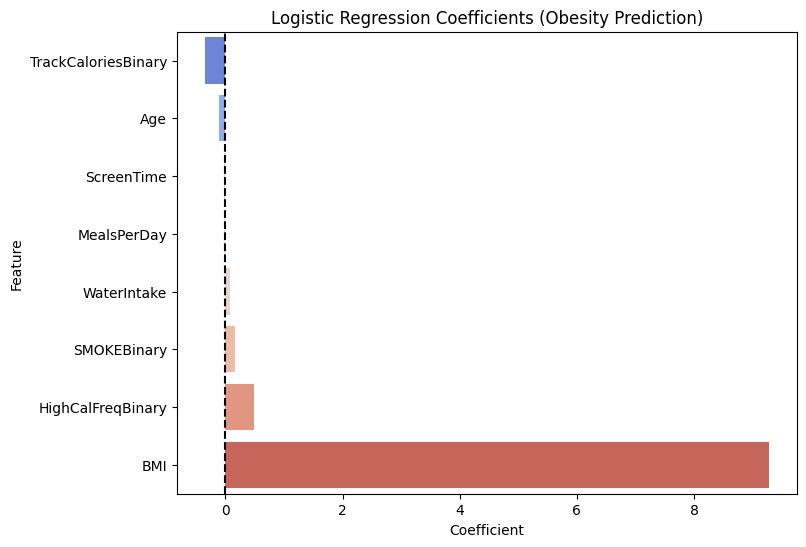

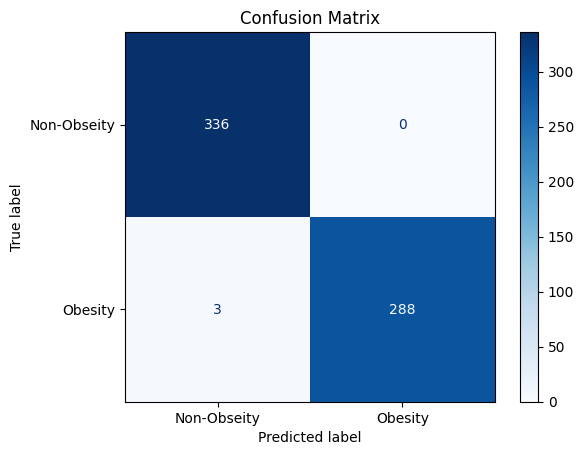

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       336
           1       1.00      0.99      0.99       291

    accuracy                           1.00       627
   macro avg       1.00      0.99      1.00       627
weighted avg       1.00      1.00      1.00       627

Accuracy: 0.9952153110047847


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Encode target: 1 if obesity-related, else 0
df['ObesityLevelBinary'] = df['ObesityLevel'].apply(lambda x: 1 if "Obesity" in x else 0)
df['HighCalFreqBinary'] = df['HighCalFreq'].apply(lambda x: 1 if "yes" in x else 0)
df['SMOKEBinary'] = df['SMOKE'].apply(lambda x: 1 if "yes" in x else 0)
df['TrackCaloriesBinary'] = df['TrackCalories'].apply(lambda x: 1 if "yes" in x else 0)

# Select features (you can expand this list)
features = ['Age','BMI','HighCalFreqBinary','SMOKEBinary','TrackCaloriesBinary','WaterIntake','ScreenTime','MealsPerDay']
X = df[features]
y = df['ObesityLevelBinary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# --- Visualization 1: Feature Coefficients ---
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="coolwarm")
plt.title("Logistic Regression Coefficients (Obesity Prediction)")
plt.axvline(0, color='black', linestyle='--')
plt.show()

# --- Visualization 2: Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Obseity','Obesity'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

**Observation :**
- The logistic regression model predicts obesity very accurately, mainly because BMI is the strongest factor. BMI has a very large positive effect on obesity, meaning people with higher BMI are much more likely to be classified as obese.

- Other lifestyle factors have positive but much smaller effects:
  - High-calorie food intake and smoking slightly increase the chance of obesity.

  Negative Impact:
  - Tracking calories is the strongest negative predictor, meaning people who track what they eat are less likely to be obese.

  Negligible impacting factors: (co-eff are close to zero)
  - Factors like age, screen time, water intake, and meals per day have very small effects and do not influence the prediction much.


The model's accuracy is extremely high (99.5%), which suggests the model depends heavily on BMI. Since obesity categories are usually defined using BMI, the model might be overfitting by predicting obesity mainly from BMI itself.

/tmp/ipython-input-1673583632.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="coolwarm")


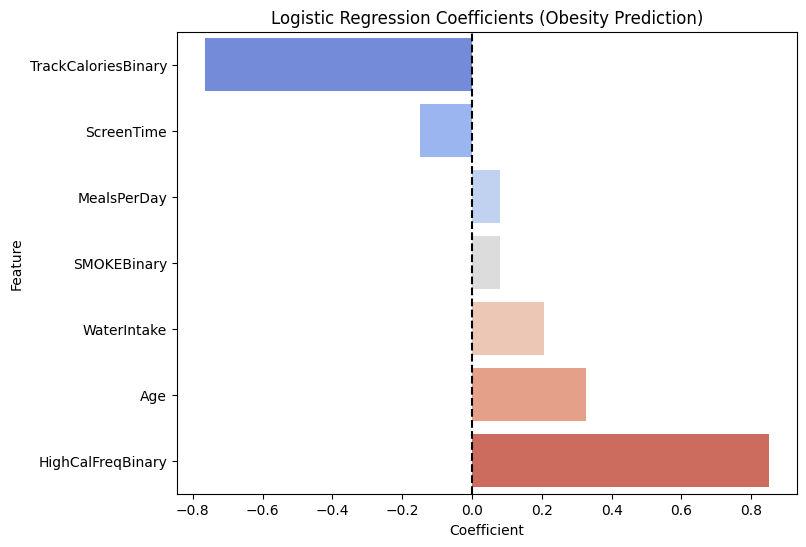

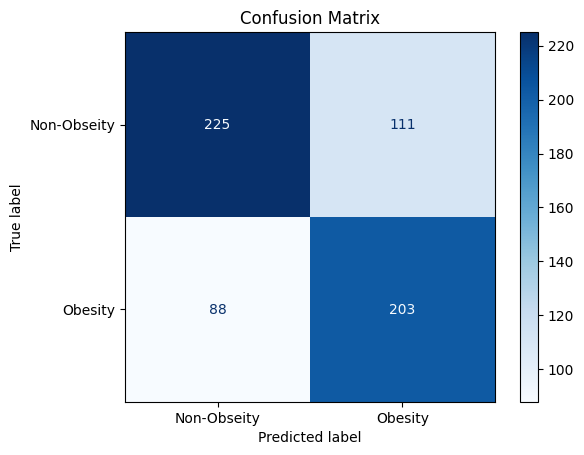

              precision    recall  f1-score   support

           0       0.72      0.67      0.69       336
           1       0.65      0.70      0.67       291

    accuracy                           0.68       627
   macro avg       0.68      0.68      0.68       627
weighted avg       0.69      0.68      0.68       627

Accuracy: 0.682615629984051


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Encode target: 1 if obesity-related, else 0
df['ObesityLevelBinary'] = df['ObesityLevel'].apply(lambda x: 1 if "Obesity" in x else 0)
df['HighCalFreqBinary'] = df['HighCalFreq'].apply(lambda x: 1 if "yes" in x else 0)
df['SMOKEBinary'] = df['SMOKE'].apply(lambda x: 1 if "yes" in x else 0)
df['TrackCaloriesBinary'] = df['TrackCalories'].apply(lambda x: 1 if "yes" in x else 0)

# Select features (you can expand this list)
features = ['Age','HighCalFreqBinary','SMOKEBinary','TrackCaloriesBinary','WaterIntake','ScreenTime','MealsPerDay']
X = df[features]
y = df['ObesityLevelBinary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# --- Visualization 1: Feature Coefficients ---
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="coolwarm")
plt.title("Logistic Regression Coefficients (Obesity Prediction)")
plt.axvline(0, color='black', linestyle='--')
plt.show()

# --- Visualization 2: Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Obseity','Obesity'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

**Observation**
After removing BMI from the model, the accuracy dropped to 68.3%, which is much lower than before. This shows that BMI was the main factor driving the earlier high accuracy.

Without BMI, the model now depends only on lifestyle habits (like calorie intake, smoking, water intake, tracking calories, etc.), which are weaker predictors of obesity. This makes the model less accurate.

Overall:
Removing BMI clearly shows that lifestyle factors alone cannot predict obesity very strongly, and BMI is the most important variable in this dataset.


/tmp/ipython-input-3939606711.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="coolwarm")


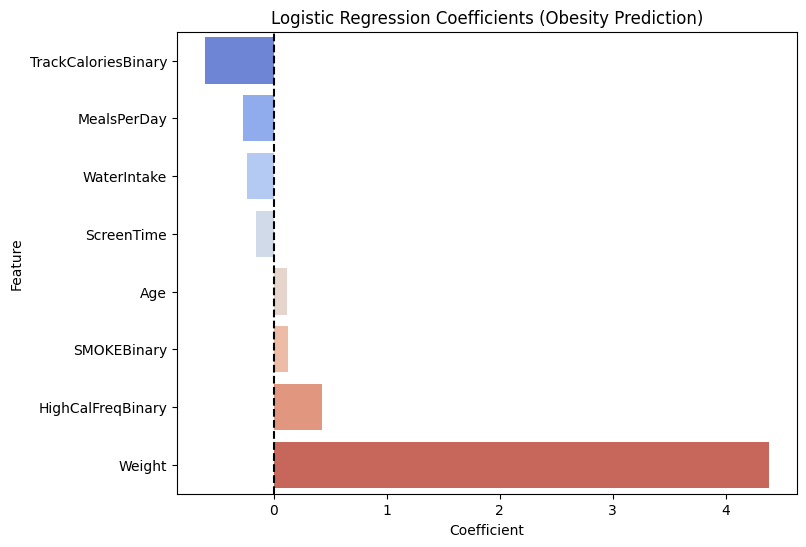

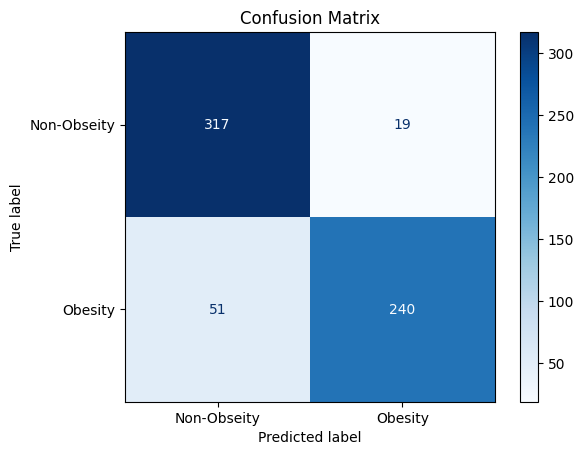

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       336
           1       0.93      0.82      0.87       291

    accuracy                           0.89       627
   macro avg       0.89      0.88      0.89       627
weighted avg       0.89      0.89      0.89       627

Accuracy: 0.8883572567783095


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Encode target: 1 if obesity-related, else 0
df['ObesityLevelBinary'] = df['ObesityLevel'].apply(lambda x: 1 if "Obesity" in x else 0)
df['HighCalFreqBinary'] = df['HighCalFreq'].apply(lambda x: 1 if "yes" in x else 0)
df['SMOKEBinary'] = df['SMOKE'].apply(lambda x: 1 if "yes" in x else 0)
df['TrackCaloriesBinary'] = df['TrackCalories'].apply(lambda x: 1 if "yes" in x else 0)

# Select features (you can expand this list)
features = ['Age','Weight','HighCalFreqBinary','SMOKEBinary','TrackCaloriesBinary','WaterIntake','ScreenTime','MealsPerDay']
X = df[features]
y = df['ObesityLevelBinary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# --- Visualization 1: Feature Coefficients ---
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="coolwarm")
plt.title("Logistic Regression Coefficients (Obesity Prediction)")
plt.axvline(0, color='black', linestyle='--')
plt.show()

# --- Visualization 2: Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Obseity','Obesity'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

**Observation**
When BMI was removed and only weight was added back into the model, the accuracy improved to 88%. This shows that weight is still a strong predictor of obesity, even without BMI.

The accuracy is lower than when BMI was included (99.5%) but much higher than the model with only lifestyle factors (68%). This makes sense because BMI is directly calculated using weight and height, so weight alone still carries a lot of information about body size.

Overall:
Adding weight back into the model greatly improves accuracy, showing that weight is an important factor for predicting obesity, even when BMI is not used.

## Model Comparison Table (Logistic Regression Accuracy)

| Model Version                          | Features Used                                                                                              | Accuracy  |
| -------------------------------------- | ---------------------------------------------------------------------------------------------------------- | --------- |
| **Model 1: With BMI**                  | Age, HighCalFreqBinary, SMOKEBinary, TrackCaloriesBinary, WaterIntake, ScreenTime, MealsPerDay, **BMI**    | **0.995** |
| **Model 2: Without BMI**               | Age, HighCalFreqBinary, SMOKEBinary, TrackCaloriesBinary, WaterIntake, ScreenTime, MealsPerDay             | **0.683** |
| **Model 3: With Weight Only (no BMI)** | Age, HighCalFreqBinary, SMOKEBinary, TrackCaloriesBinary, WaterIntake, ScreenTime, MealsPerDay, **Weight** | **0.88**  |


**Final Conclusion**

This project explored how eating habits, lifestyle behaviors, physical activity, and personal characteristics relate to obesity using the UCI Obesity Dataset. A combination of statistical tests (t-tests, Chi-square, ANOVA) and logistic regression modeling was used to understand the key factors that influence obesity levels and predict obesity risk.

**Data Acquisition and Initial Loading**

The dataset used in this project is the ObesityDataSet_raw_and_data_sinthetic.csv file from the UCI Machine Learning Repository.
It contains information on eating habits, physical activity, and demographics of individuals from Mexico, Peru, and Colombia.

The data was imported into a Pandas DataFrame using the following code:

url = "https://raw.githubusercontent.com/RohitG57/Estimation-of-obesity-levels-based-on-eating-habits-and-physical-condition/main/ObesityDataSet_raw_and_data_sinthetic.csv"

df = pd.read_csv(url)

**Cleaning and Preprocessing**

1. Renaming Columns:
- Complex column names were replaced with shorter, clear names (e.g., NObeyesdad → ObesityLevel).

2. Converting Data Types:
- Repeated text fields such as Gender, Snacking, AlcoholFreq, TransportMode, and ObesityLevel were converted to category type to improve performance.

3. Checking for Missing Values:
- No missing values were found in the dataset.

4. Removing Duplicates:
- Duplicate rows were removed.
- Final dataset size: 2,087 rows × 17 columns.

5. Creating New Features:
- BMI and ObesityBinary variables were added to support regression analysis.

**1. Physical Measures Are the Strongest Indicators of Obesity**

Physical characteristics—especially BMI and weight—are the most powerful predictors of obesity.

The logistic regression model with BMI achieved 99.5% accuracy, showing that BMI almost fully determines obesity category.

Removing BMI dropped accuracy to 68.3%, proving that lifestyle factors alone cannot accurately predict obesity status.

A model using Weight only achieved 88% accuracy, confirming that weight is a strong predictor, but still weaker than BMI.

Conclusion:
Obesity classification is primarily driven by measurable physical indicators rather than lifestyle habits.

**2. Gender Influences Weight and Obesity Levels**

The t-test revealed that males weigh significantly more than females, and the Chi-square test showed a strong association between Gender and Obesity Level.

Examples from the dataset:
- More males fall into Obesity Type II
- More females fall into Obesity Type III

This indicates that obesity patterns differ across genders and that demographic factors play an important role.

**2.1 T-Test Additional Observation**
- T-statistic = 7.50 (far beyond the critical value ±1.96)
- Type II error (β) = 0.007 → very small chance of missing a true difference
- Power of test = 0.993 → extremely strong ability to detect a real difference
- **Conclusion:**
The result is highly reliable: males weigh significantly more than females.

**3. Family History Has a Strong Impact on Weight**
- Individuals with a family history of being overweight showed much higher average weights.
- The t-test showed an extremely significant difference (p-value near zero).
- This suggests strong influence from genetics or shared family lifestyle habits.

**4. Exercise Frequency Helps Distinguish Obese vs Non-Obese Groups**
- Both statistical tests and plots showed that:
  - Non-obese individuals exercise more frequently
  - Obese individuals report lower exercise levels

Exercise is not as strong a predictor as BMI, but it still plays a meaningful role in maintaining a healthy weight.

**5. Snacking Habits Significantly Affect Weight**
- The ANOVA test showed large differences in weight across snacking groups:
  - “Sometimes” snackers have the highest average weight
- Several group differences were significant in post-hoc testing
  - Only “Always” vs “No” showed no significant difference

**Conclusion:**
Snacking habits meaningfully contribute to weight variation, but their effect is still smaller compared to BMI and weight.

**6. Transport Mode Strongly Relates to Obesity Levels**
(Chi-Square Test – TransportMode vs ObesityLevel)

- Chi-square statistic: 288.57
- Degrees of freedom: 24
- p-value: 3.33 × 10⁻⁴⁷

This is an extremely strong and significant association.

**Interpretation:**
- How people travel—walking, biking, public transit, or using a car—is clearly connected to their obesity category.
- Active transport modes tend to be associated with lower obesity levels.

**7. Lifestyle Habits Show Small but Meaningful Trends**
- Variables such as:
  - water intake
  - high-calorie food frequency
  - smoking
  - calorie tracking
  - screen time
showed small coefficients in logistic regression.

This means lifestyle habits contribute to obesity risk, but their influence is much weaker than BMI and weight.

**Overall Summary**

This study demonstrates the following:

 - BMI is the strongest determinant of obesity. Removing it from the model drastically reduces prediction accuracy.
 - Weight is the second strongest predictor.
 - Gender, family history, exercise habits, snacking behavior, and transportation mode all show statistically significant relationships with obesity.
 - Lifestyle habits alone cannot reliably predict obesity, but they provide helpful supporting insights.
 - Physical measurements remain the primary determinants of obesity classification.

**Final Insight:
Effective obesity management requires both regular monitoring of BMI/weight and targeted lifestyle interventions.**
